In [7]:
import numpy as np
import matplotlib.pyplot as plt
import denn.utils as ut

In [10]:
gan_reps1 = np.load('/Users/dylanrandle/Downloads/coo_gan_rand_reps.npy')
gan_reps2 = np.load('/Users/dylanrandle/Downloads/coo_gan_rand_reps_n200.npy')
gan_reps3 = np.load('/Users/dylanrandle/Downloads/coo_gan_rand_reps_n400.npy')
# l2_reps = np.load('/Users/dylanrandle/Downloads/coo_mse_rand_reps.npy')
# l1_reps = np.load('/Users/dylanrandle/Downloads/coo_l1_rand_reps.npy')
# huber_reps = np.load('/Users/dylanrandle/Downloads/coo_huber_rand_reps.npy')

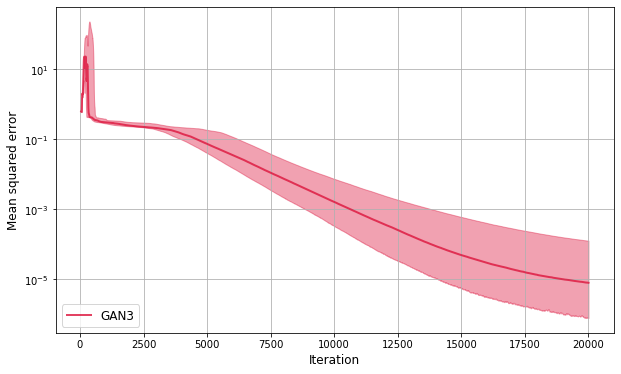

In [23]:
arrs_dict = {
#     "GAN1": gan_reps1, 
#              "GAN2": gan_reps2, 
             "GAN3": gan_reps3 }
#              "$L_2$": l2_reps,
#              "$L_1$": l1_reps} #, "Huber": huber_reps}
# arrs_dict = {"GAN": gan_reps, "$L_2$": l2_reps}
ut.plot_reps_results(arrs_dict, fname=None, window=50, figsize=(10,6), pctiles=(2.5,97.5))

# RK4

In [12]:
from denn.rk4 import rk4
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def coo_deriv(t, xy):
    """ 
    dxdt = -ty
    dydt = tx
    """
    x, y = xy[0], xy[1]
    
    rhs1 = -t*y
    rhs2 = t*x
    return np.array([rhs1, rhs2])
    return rhs

In [18]:
t, sol = rk4(coo_deriv, [0, 6.28], [1, 0], 400)

In [19]:
from denn.problems import CoupledOscillator
import torch
sir_sol = CoupledOscillator(x0=1, y0=0, n=200).get_solution(torch.tensor(t))

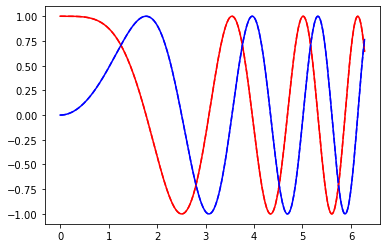

In [20]:
plt.plot(t, sol[:,0], color='red')
plt.plot(t, sol[:,1], color='blue')

plt.plot(t, sir_sol[:,0], '--', color='red')
plt.plot(t, sir_sol[:,1], '--', color='blue')

In [21]:
mse = np.mean( (sol - sir_sol.numpy())**2 )
mse

1.0445355634902771e-12